In [92]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics as stats
from sklearn.linear_model import LinearRegression

In [93]:
#Functions
def merge_data(data_1, data_2):
    code_1 = data_1['Code'].values.tolist()
    code_2 = data_2['Code'].values.tolist()
        
    for x in range(len(data_1)):
        if code_1[x] not in code_2:
            data_1 = data_1.drop(x)
    
    for x in range(len(data_2)):
        if code_2[x] not in code_1:
            data_2 = data_2.drop(x)
    
    data_1 = data_1.sort_values(by='Code')
    data_1 = data_1.reset_index(drop=True)
    data_2 = data_2.sort_values(by='Code')
    data_2 = data_2.reset_index(drop=True)
    
    return data_1, data_2

# 1.

### a)

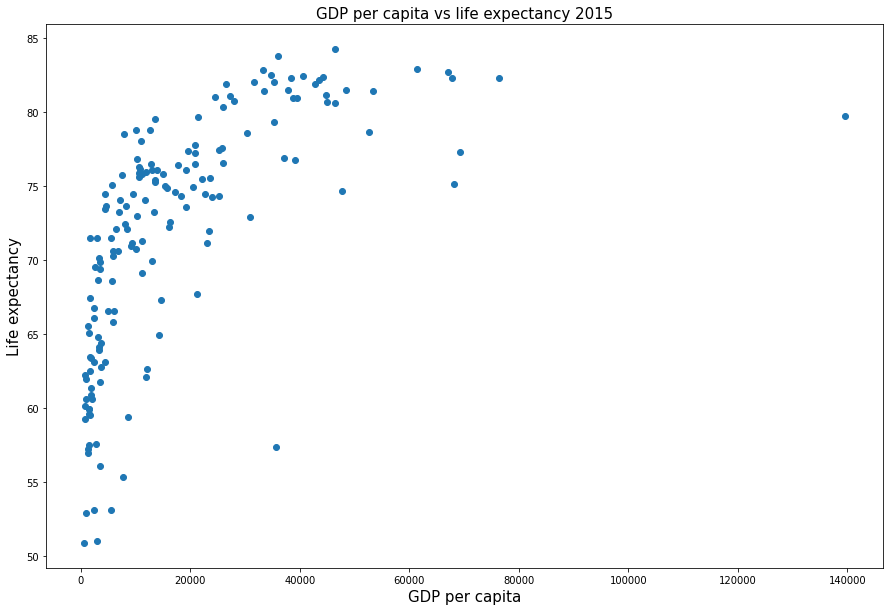

In [94]:
#Csv file to DataFrame:
gdp = pd.read_csv('datasets/GDP-2015.csv')
le = pd.read_csv('datasets/life-expectancy-at-birth-total-years.csv')
le = le.loc[le['Year'] == (2015)] #remove irrelavant years
le = le.reset_index(drop=True)
[gdp,le] = merge_data(gdp,le) #match the countries in both lists, i.e remove the countries that doesn't exist in both lists
plt.figure(figsize=(15, 10))
plt.scatter(gdp['GDP per capita'],le['Life expectancy at birth, total (years)'])
plt.title('GDP per capita vs life expectancy 2015', fontsize = 15)
plt.xlabel('GDP per capita', fontsize = 15)
plt.ylabel('Life expectancy', fontsize = 15)
plt.show()

### b)

From this graph we see that there seems to be a correlation between GDP per capita and Life expectancy. This seems resonable since a country with higher GDP per capita can invest more in for example healthcare systems, that in turn would raise the life expectancy. However, there would need to be more investigaion into this before drawing a conclusion since this correlation can depend on more factors.

### c)

We have used two datasets from where we get our data. In order to know the data for GPD per capita we've used the provided dataset named "GDP-2015.csv" and for Life expectancy we've downloaded a dataset named "life-expectancy-at-birth-total-years.csv". The dataset used for finding the life expectancy contained data spanning from the years 1960 to 2019 so we have performed data cleaning and removed the data from all years excluding 2015, which is the only year we're intressed in. These two dataset contained different amounts of elements, so for us to be able to draw a scatterplot we then had to find the intersection of these two sets.

### d)

In [95]:
data = [gdp['Entity'], gdp['Code'], gdp['GDP per capita'], le['Life expectancy at birth, total (years)']]
headers = ["Entity", "Code", "GDP per capita", "Life Expectancy"]
gdp_le = pd.concat(data,axis=1,keys=headers)

pop = pd.read_csv('datasets/population-since-1800.csv')
pop = pop.loc[pop['Year'] == (2015)] #remove irrelavant years
pop = pop.reset_index(drop=True)
[gdp_le, pop] = merge_data(gdp_le,pop)
GDP = gdp['GDP per capita']*pop['Population (historical estimates)']

data = [gdp['Entity'], gdp['Code'], gdp['GDP per capita'], GDP, le['Life expectancy at birth, total (years)']]
headers = ["Entity", "Code", "GDP per capita", "GDP", "Life Expectancy"]
gdp_le = pd.concat(data,axis=1,keys=headers)

In [96]:
le_mean = stats.mean(gdp_le['Life Expectancy'])
le_std = stats.pstdev(gdp_le['Life Expectancy'])

high_le = gdp_le[gdp_le['Life Expectancy'] > (le_mean+le_std)]
high_le = high_le.sort_values(by='Life Expectancy', ascending=False)
high_le.index = np.arange(1,len(high_le)+1)

high_le[['Entity', 'Life Expectancy']]

,Entity,Life Expectancy
1,Hong Kong,84.278049
2,Japan,83.793902
3,Switzerland,82.897561
4,Spain,82.831707
5,Singapore,82.743902
6,Italy,82.543902
7,Iceland,82.468293
8,Australia,82.400000
9,France,82.321951
10,Norway,82.304878


### e)

None of the countries with high life expectancy have a gdp below the mean, but these countries have a gdp below one standard deviation above the mean.

In [97]:
gdp_mean = stats.mean(gdp_le['GDP per capita'])
gdp_std = stats.pstdev(gdp_le['GDP per capita'])

high_le_low_gdp = gdp_le[(gdp_le['Life Expectancy'] > (le_mean+le_std)) & (gdp_le['GDP per capita'] < (gdp_mean+gdp_std))]
high_le_low_gdp.index = np.arange(1,len(high_le_low_gdp)+1)

high_le_low_gdp[['Entity', 'GDP per capita', 'Life Expectancy']]

,Entity,GDP per capita,Life Expectancy
1,Cyprus,25903,80.350000
2,Spain,33376,82.831707
3,Greece,24545,81.036585
4,Israel,31729,82.051220
5,Italy,34673,82.543902
6,Japan,36030,83.793902
7,South Korea,35316,82.024390
8,Malta,26577,81.897561
9,New Zealand,33445,81.456829
10,Portugal,27255,81.124390


### f)

To answer this question, computations where made to find countries with low life expectancy and high GDP. The results can be seen below, which leads to the conclusion that not every strong economy have high life expectancy.

In [98]:
GDP_mean = stats.mean(gdp_le['GDP'])
GDP_std = stats.pstdev(gdp_le['GDP'])

low_le_high_gdp = gdp_le[(gdp_le['Life Expectancy'] < (le_mean+le_std)) & (gdp_le['GDP'] > (GDP_mean+GDP_std))]
low_le_high_gdp.index = np.arange(1,len(low_le_high_gdp)+1)

low_le_high_gdp

,Entity,Code,GDP per capita,GDP,Life Expectancy
1,Brazil,BRA,15377,3144162238143,74.994000
2,China,CHN,12002,16884988111736,75.928000
3,India,IND,5639,7387949338488,68.607000
4,Russia,RUS,23118,3351764593962,71.183415
5,United States,USA,52591,16875311306392,78.690244


### g)

When doing the same computations as in f), but using gdp per capita instead of GDP, a more accurate result is attained. Since a country with a high GDP could have a low GDP per capita becuase of a large population.
GDP is a better indicator of how strong an economy is and GDP per capita is a better indicator of the populations well-being since it looks at how much money a country has per person.
When looking at question f) the worlds strongest economies with low life expectancy appears but when looking at the gdp per capita in these countries, they are rather low which could be the reason for the lower life expectancy. In question g) however, we see that countries with large inequalities appears instead.

In [99]:
low_le_high_gdp = gdp_le[(gdp_le['Life Expectancy'] < (le_mean+le_std)) & (gdp_le['GDP per capita'] > (gdp_mean+gdp_std))]
low_le_high_gdp.index = np.arange(1,len(low_le_high_gdp)+1)

low_le_high_gdp

,Entity,Code,GDP per capita,GDP,Life Expectancy
1,United Arab Emirates,ARE,69237,641335130352,77.285000
2,Bahrain,BHR,39197,53772522041,76.762000
3,Kuwait,KWT,68127,261307103676,75.130000
4,Qatar,QAT,139542,358024025736,79.758000
5,Saudi Arabia,SAU,47737,1514106699212,74.651000
6,United States,USA,52591,16875311306392,78.690244


# 2

### a)

#### Test 1:

The first combination of data that was made was to compare how the population density has effected the spread of the covid-19 virus. Some data related to covid-19 was downloaded and a scatter plot was made (which can be seen below). To answer the question the data was also compared to see if countries with low population desity had high number of cases per million, and vice versa (the results can be seen below). 

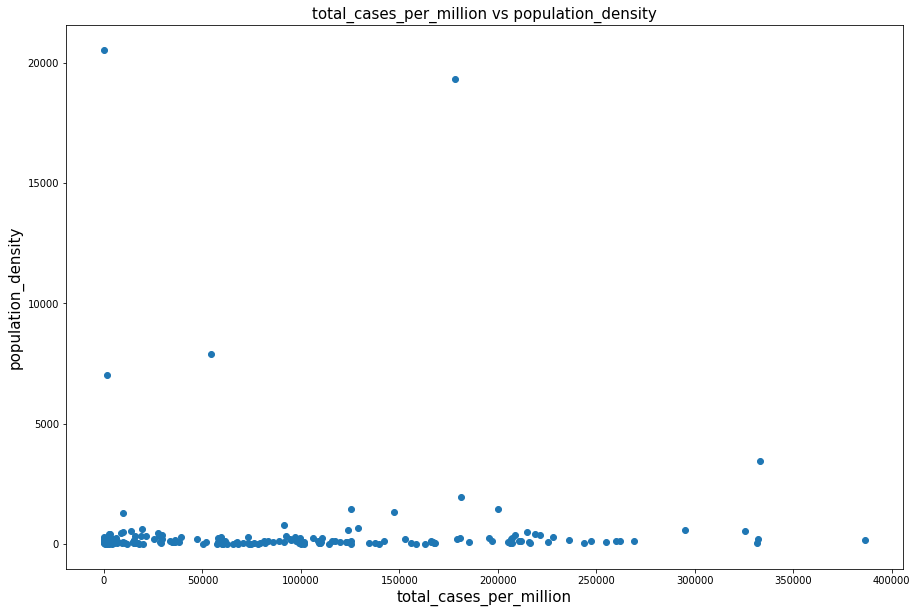

In [100]:
x = 'total_cases_per_million'
y = 'population_density'

covid = pd.read_csv('datasets/owid-covid-data.csv')
covid = covid.loc[covid['date'] == '2022-01-19'] #remove irrelavant years
covid = covid.dropna(subset=[y])
covid = covid.dropna(subset=[x])
covid = covid.dropna(subset=['continent'])
covid = covid.reset_index(drop=True)
plt.figure(figsize=(15, 10))
plt.scatter((covid[x]), covid[y])
plt.title(x +' vs '+ y, fontsize = 15)
plt.xlabel(x, fontsize = 15)
plt.ylabel(y, fontsize = 15)
plt.show()

In [101]:
y_mean = stats.mean(covid[y])
y_std = stats.pstdev(covid[y])
x_mean = stats.mean(covid[x])
x_std = stats.pstdev(covid[x])
low_y_high_x = covid[(covid[y] < (y_mean-y_std/5)) & (covid[x] > (x_mean+x_std/5))]
low_y_high_x.index = np.arange(1,len(low_y_high_x)+1)
low_y_high_x[['location', y, x]]

,location,population_density,total_cases_per_million
1,Argentina,16.177,163282.351
2,Belize,16.426,109022.881
3,Brazil,25.040,109467.804
4,Greenland,0.137,158507.421
5,Iceland,3.404,139740.016
6,Mongolia,1.980,125419.535
7,Suriname,3.612,114512.046
8,Sweden,24.718,167353.286
9,Uruguay,19.751,155851.452


In [102]:
high_y_low_x = covid[(covid[y] > (y_mean+y_std/5)) & (covid[x] < (x_mean-x_std/5))]
high_y_low_x.index = np.arange(1,len(high_y_low_x)+1)
high_y_low_x[['location', y, x]]

,location,population_density,total_cases_per_million
1,Bangladesh,1265.036,9875.283
2,Hong Kong,7039.714,1705.328
3,Macao,20546.766,119.989
4,Singapore,7915.731,54290.194


These are some interesting results, since one would think that the population density of a country would increase the spread
of the covid-19 virus. But when looking at these results, it is clear that this is not the case. Countries with lower population density has more cases of covid-19 per million than countries with higher population density, the reason for this, however, is unclear.

#### Test 2:

The second combination of data that was made was to compare the human development index in a country with the amount of people vaccinated for covid-19 in that country. This comparison was made to see if the more developed countries have a higher rate of vaccinated people. The results can be seen below.

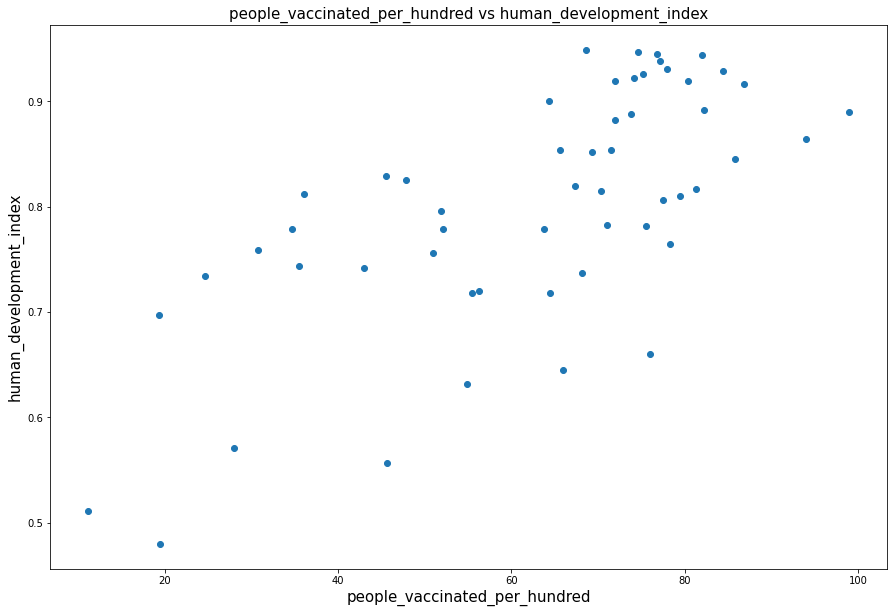

In [114]:
x = 'people_vaccinated_per_hundred'
y = 'human_development_index'

covid = pd.read_csv('datasets/owid-covid-data.csv')
covid = covid.loc[covid['date'] == '2022-01-19'] #remove irrelavant years
covid = covid.dropna(subset=[y])
covid = covid.dropna(subset=[x])
covid = covid.dropna(subset=['continent'])
covid = covid.reset_index(drop=True)
plt.figure(figsize=(15, 10))
plt.scatter((covid[x]), covid[y])
plt.title(x +' vs '+ y, fontsize = 15)
plt.xlabel(x, fontsize = 15)
plt.ylabel(y, fontsize = 15)
plt.show()

In [ ]:
y_mean = stats.mean(covid[y])
y_std = stats.pstdev(covid[y])
x_mean = stats.mean(covid[x])
x_std = stats.pstdev(covid[x])
low_y_high_x = covid[(covid[y] < (y_mean-y_std/5)) & (covid[x] > (x_mean+x_std/5))]
low_y_high_x.index = np.arange(1,len(low_y_high_x)+1)
low_y_high_x[['location', y, x]]

In [111]:
high_y_low_x = covid[(covid[y] > (y_mean+y_std/5)) & (covid[x] < (x_mean-x_std/5))]
high_y_low_x.index = np.arange(1,len(high_y_low_x)+1)
high_y_low_x[['location', y, x]]

,location,human_development_index,people_vaccinated_per_hundred


In [103]:
high_y_high_x = covid[(covid[y] > (y_mean+y_std)) & (covid[x] > (x_mean-x_std))]
high_y_high_x.index = np.arange(1,len(high_y_high_x)+1)
high_y_high_x[['location', y, x]]

,location,human_development_index,people_vaccinated_per_hundred
1,Australia,0.944,82.01
2,Austria,0.922,74.16
3,Canada,0.929,84.45
4,Finland,0.938,77.16
5,Germany,0.947,74.60
6,Hong Kong,0.949,68.61
7,Israel,0.919,71.91
8,Japan,0.919,80.33
9,New Zealand,0.931,77.95
10,South Korea,0.916,86.80


In [104]:
low_y_low_x = covid[(covid[y] < (y_mean+y_std)) & (covid[x] < (x_mean-x_std))]
low_y_low_x.index = np.arange(1,len(low_y_low_x)+1)
low_y_low_x[['location', y, x]]

,location,human_development_index,people_vaccinated_per_hundred
1,Afghanistan,0.511,11.17
2,Georgia,0.812,36.07
3,Guinea-Bissau,0.480,19.47
4,Jamaica,0.734,24.68
5,Kyrgyzstan,0.697,19.37
6,Lebanon,0.744,35.47
7,Saint Lucia,0.759,30.71
8,Ukraine,0.779,34.69
9,Zimbabwe,0.571,27.98


The two first dataframes show if there are any countries that have a low human development index and high vaccination rate, and vice versa. However, these coutries do not deviate far from the mean. This means that there are no countries that have a low human development index and high vaccination rate, and vice versa. Which in return means that there is a correlation between the human development index and people vaccinated per hundred. This conclusion is further strengthened by the results in the last two dataframes, which computes the countries with high human development index and high vaccination rate and the countries with low human development index and low vaccination rate. This result can also be seen in the scatter plot since 

### b)

iso_code,
continent,
location,
date,
total_cases,
new_cases,
new_cases_smoothed,
total_deaths,
new_deaths,
new_deaths_smoothed,
total_cases_per_million,
new_cases_per_million,
new_cases_smoothed_per_million,
total_deaths_per_million,
new_deaths_per_million,
new_deaths_smoothed_per_million,
reproduction_rate,
icu_patients,
icu_patients_per_million,
hosp_patients,
hosp_patients_per_million,
weekly_icu_admissions,
weekly_icu_admissions_per_million,
weekly_hosp_admissions,
weekly_hosp_admissions_per_million,
new_tests,
total_tests,
total_tests_per_thousand,
new_tests_per_thousand,
new_tests_smoothed,
new_tests_smoothed_per_thousand,
positive_rate,
tests_per_case,
tests_units,
total_vaccinations,
people_vaccinated,
people_fully_vaccinated,
total_boosters,
new_vaccinations,
new_vaccinations_smoothed,
total_vaccinations_per_hundred,
people_vaccinated_per_hundred,
people_fully_vaccinated_per_hundred,
total_boosters_per_hundred,
new_vaccinations_smoothed_per_million,
new_people_vaccinated_smoothed,
new_people_vaccinated_smoothed_per_hundred,
stringency_index,
population,
population_density,
median_age,
aged_65_older,
aged_70_older,
gdp_per_capita,
extreme_poverty,
cardiovasc_death_rate,
diabetes_prevalence,
female_smokers,
male_smokers,
handwashing_facilities,
hospital_beds_per_thousand,
life_expectancy,
human_development_index,
excess_mortality_cumulative_absolute,
excess_mortality_cumulative,excess_mortality,
excess_mortality_cumulative_per_million